In [1]:
import pandas as pd

import glasbey
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors
SIMILARITYDIR="/home/zyxing/dance/examples/atlas/sc_similarity_examples"
all_datasets = []
tissues=['blood','brain','heart','intestine','kidney','lung','pancreas']
for tissue in tissues:
    dataset_info=pd.read_excel(f"{SIMILARITYDIR}/data/Cell Type Annotation Atlas.xlsx",sheet_name=tissue,index_col=0)
    dataset_info['tissue'] = tissue.capitalize()
    all_datasets.append(dataset_info)
combined_dataset = pd.concat(all_datasets, ignore_index=True)
combined_dataset.loc[:,'dataset_tissue']=combined_dataset['dataset_id']+"_"+combined_dataset['tissue']
combined_dataset=combined_dataset[combined_dataset['queryed']==False]

In [2]:
import json
import sys
rt_dir = "/home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results"
try:
    with open(f'{rt_dir}/query_result.json', 'r') as f:
        query_result = json.load(f)
    with open(f'{rt_dir}/atlas_result.json', 'r') as f:
        atlas_result = json.load(f)
except FileNotFoundError:
    print("Error: query_result.json or atlas_result.json not found. Exiting.")
    sys.exit(1)
except json.JSONDecodeError:
    print("Error: Could not decode JSON from query_result.json or atlas_result.json. Exiting.")
    sys.exit(1)

# --- Combine Query/Atlas Data Structure ---
data_structure = {}
all_keys = set(query_result.keys()) | set(atlas_result.keys())
for key in all_keys:
    query_lists = query_result.get(key, [])
    atlas_lists = atlas_result.get(key, [])
    combined_data = []
    for i, sublist in enumerate(query_lists):
        combined_data.extend([(uuid, 'query', i) for uuid in sublist])
    for i, sublist in enumerate(atlas_lists):
        combined_data.extend([(uuid, 'atlas', i) for uuid in sublist])
    data_structure[key] = combined_data

In [3]:
all_uuids_set=set(combined_dataset['dataset_id'])
sorted_unique_uuids = sorted(list(all_uuids_set))
n_datasets = len(sorted_unique_uuids)
print(f"Total unique datasets found across all tissues: {n_datasets}")

# --- Color Generation ---
print("Generating colors using glasbey...")
colors_generated_rgb = glasbey.create_palette(palette_size=n_datasets, lightness_bounds=(25, 85), chroma_bounds=(30, 100))
colors_generated = [mcolors.to_rgba(c) for c in colors_generated_rgb]

# --- Assign Colors ---
uuid_to_color = {uuid: colors_generated[i] for i, uuid in enumerate(sorted_unique_uuids)}
uuid_to_shortname = {uuid: f"Dataset {i}" for i, uuid in enumerate(sorted_unique_uuids)}

Total unique datasets found across all tissues: 77
Generating colors using glasbey...


In [4]:
# (Using the robust version of load_anndata_object_with_scvi from previous step)
def load_anndata_object(uuid, tissue):
    # --- Using the previously corrected version ---
    from dance.atlas.sc_similarity.anndata_similarity import AnnDataSimilarity, get_anndata
    from dance.settings import DANCEDIR
    import pandas as pd
    import numpy as np
    import traceback
    print(f"    Attempting to load AnnData for {uuid} (tissue: {tissue})")
    # --- Replace with your actual get_anndata call if possible ---
    adata = get_anndata(tissue=tissue.capitalize(), species="human", filetype="h5ad",
                                    train_dataset=[f"{uuid}"], data_dir=str(DANCEDIR / "examples/tuning/temp_data"))
    if adata is None or adata.n_obs == 0:
        print(f"    -> Failed to load or empty AnnData for {uuid}. Skipping.")
        return None
    print(f"    -> Initial load successful for {uuid} ({adata.n_obs} cells). Processing...")

    adata.obs["n_counts"] = np.asarray(adata.X.sum(axis=1)).flatten()
    adata.obs["joinid"] = list(range(adata.n_obs))
    adata.obs["batch_uuid"] = uuid
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    return adata
        


Processing tissue: blood
 Processing c7775e88-49bf-4ba2-a03b-93f00447c958...


/home/zyxing/dance/dance/utils/matrix.py:178: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  for j in numba.prange(n):
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


    Attempting to load AnnData for c7775e88-49bf-4ba2-a03b-93f00447c958 (tissue: blood)


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
[INFO][2025-07-20 11:51:50,745][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16315
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:50,746]

    -> Initial load successful for c7775e88-49bf-4ba2-a03b-93f00447c958 (10000 cells). Processing...
    -> Successfully loaded and verified c7775e88-49bf-4ba2-a03b-93f00447c958 for concatenation.
 Processing 456e8b9b-f872-488b-871d-94534090a865...
    Attempting to load AnnData for 456e8b9b-f872-488b-871d-94534090a865 (tissue: blood)


[INFO][2025-07-20 11:51:50,963][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 11701
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:50,964][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:50,965][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:50,965][dance][_load_raw_data_single_h

    -> Initial load successful for 456e8b9b-f872-488b-871d-94534090a865 (10000 cells). Processing...
    -> Successfully loaded and verified 456e8b9b-f872-488b-871d-94534090a865 for concatenation.
 Processing 738942eb-ac72-44ff-a64b-8943b5ecd8d9...
    Attempting to load AnnData for 738942eb-ac72-44ff-a64b-8943b5ecd8d9 (tissue: blood)


[INFO][2025-07-20 11:51:51,239][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 12246
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:51,240][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:51,241][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:51,241][dance][_load_raw_data_single_h

    -> Initial load successful for 738942eb-ac72-44ff-a64b-8943b5ecd8d9 (10000 cells). Processing...
    -> Successfully loaded and verified 738942eb-ac72-44ff-a64b-8943b5ecd8d9 for concatenation.
 Processing d7d7e89c-c93a-422d-8958-9b4a90b69558...
    Attempting to load AnnData for d7d7e89c-c93a-422d-8958-9b4a90b69558 (tissue: blood)


[INFO][2025-07-20 11:51:51,507][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 10792
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:51,508][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:51,508][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:51,508][dance][_load_raw_data_single_h

    -> Initial load successful for d7d7e89c-c93a-422d-8958-9b4a90b69558 (10000 cells). Processing...
    -> Successfully loaded and verified d7d7e89c-c93a-422d-8958-9b4a90b69558 for concatenation.
 Processing b0e547f0-462b-4f81-b31b-5b0a5d96f537...
    Attempting to load AnnData for b0e547f0-462b-4f81-b31b-5b0a5d96f537 (tissue: blood)


[INFO][2025-07-20 11:51:51,815][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 21092
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:51,816][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:51,816][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:51,817][dance][_load_raw_data_single_h

    -> Initial load successful for b0e547f0-462b-4f81-b31b-5b0a5d96f537 (10000 cells). Processing...
    -> Successfully loaded and verified b0e547f0-462b-4f81-b31b-5b0a5d96f537 for concatenation.
 Processing a5d95a42-0137-496f-8a60-101e17f263c8...
    Attempting to load AnnData for a5d95a42-0137-496f-8a60-101e17f263c8 (tissue: blood)
    -> Initial load successful for a5d95a42-0137-496f-8a60-101e17f263c8 (1324 cells). Processing...
    -> Successfully loaded and verified a5d95a42-0137-496f-8a60-101e17f263c8 for concatenation.
 Processing 71be997d-ff75-41b9-8a9f-1288c865f921...
    Attempting to load AnnData for 71be997d-ff75-41b9-8a9f-1288c865f921 (tissue: blood)


[INFO][2025-07-20 11:51:52,041][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 549 × 2479
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:52,042][dance][_load_raw_data_single_h5ad] Number of training samples: 329
[INFO][2025-07-20 11:51:52,042][dance][_load_raw_data_single_h5ad] Number of valid samples: 110
[INFO][2025-07-20 11:51:52,043][dance][_load_raw_data_single_h5ad] Nu

    -> Initial load successful for 71be997d-ff75-41b9-8a9f-1288c865f921 (549 cells). Processing...
    -> Successfully loaded and verified 71be997d-ff75-41b9-8a9f-1288c865f921 for concatenation.
 Processing fe52003e-1460-4a65-a213-2bb1a508332f...
    Attempting to load AnnData for fe52003e-1460-4a65-a213-2bb1a508332f (tissue: blood)


[INFO][2025-07-20 11:51:52,258][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 6368 × 8746
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:52,258][dance][_load_raw_data_single_h5ad] Number of training samples: 3,820
[INFO][2025-07-20 11:51:52,258][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,274
[INFO][2025-07-20 11:51:52,259][dance][_load_raw_data_single_h5a

    -> Initial load successful for fe52003e-1460-4a65-a213-2bb1a508332f (6368 cells). Processing...
    -> Successfully loaded and verified fe52003e-1460-4a65-a213-2bb1a508332f for concatenation.
 Processing 3faad104-2ab8-4434-816d-474d8d2641db...
    Attempting to load AnnData for 3faad104-2ab8-4434-816d-474d8d2641db (tissue: blood)


[INFO][2025-07-20 11:51:52,476][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18977
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:52,477][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:52,477][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:52,478][dance][_load_raw_data_single_h

    -> Initial load successful for 3faad104-2ab8-4434-816d-474d8d2641db (10000 cells). Processing...
    -> Successfully loaded and verified 3faad104-2ab8-4434-816d-474d8d2641db for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: blood)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing d9b4bc69-ed90-4f5f-99b2-61b0681ba436...
    Attempting to load AnnData for d9b4bc69-ed90-4f5f-99b2-61b0681ba436 (tissue: blood)


[INFO][2025-07-20 11:51:52,897][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 10155
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:52,898][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:52,898][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:52,899][dance][_load_raw_data_single_h

    -> Initial load successful for d9b4bc69-ed90-4f5f-99b2-61b0681ba436 (10000 cells). Processing...
    -> Successfully loaded and verified d9b4bc69-ed90-4f5f-99b2-61b0681ba436 for concatenation.
 Processing 055ca631-6ffb-40de-815e-b931e10718c0...
    Attempting to load AnnData for 055ca631-6ffb-40de-815e-b931e10718c0 (tissue: blood)


[INFO][2025-07-20 11:51:53,111][dance][wrapped_func] Took 0:00:00.192734 to load and process data.


    -> Initial load successful for 055ca631-6ffb-40de-815e-b931e10718c0 (10000 cells). Processing...
    -> Successfully loaded and verified 055ca631-6ffb-40de-815e-b931e10718c0 for concatenation.
 Processing bc2a7b3d-f04e-477e-96c9-9d5367d5425c...
    Attempting to load AnnData for bc2a7b3d-f04e-477e-96c9-9d5367d5425c (tissue: blood)


[INFO][2025-07-20 11:51:53,361][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 12441
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:53,362][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:53,363][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:53,364][dance][_load_raw_data_single_h

    -> Initial load successful for bc2a7b3d-f04e-477e-96c9-9d5367d5425c (10000 cells). Processing...
    -> Successfully loaded and verified bc2a7b3d-f04e-477e-96c9-9d5367d5425c for concatenation.
 Processing 01209dce-3575-4bed-b1df-129f57fbc031...
    Attempting to load AnnData for 01209dce-3575-4bed-b1df-129f57fbc031 (tissue: blood)


[INFO][2025-07-20 11:51:53,605][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 10448
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:53,606][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:53,606][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:53,606][dance][_load_raw_data_single_h

    -> Initial load successful for 01209dce-3575-4bed-b1df-129f57fbc031 (10000 cells). Processing...
    -> Successfully loaded and verified 01209dce-3575-4bed-b1df-129f57fbc031 for concatenation.
 Processing 2a498ace-872a-4935-984b-1afa70fd9886...
    Attempting to load AnnData for 2a498ace-872a-4935-984b-1afa70fd9886 (tissue: blood)


[INFO][2025-07-20 11:51:53,862][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15914
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:53,862][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:53,862][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:53,863][dance][_load_raw_data_single_h

    -> Initial load successful for 2a498ace-872a-4935-984b-1afa70fd9886 (10000 cells). Processing...
    -> Successfully loaded and verified 2a498ace-872a-4935-984b-1afa70fd9886 for concatenation.
 Processing bc260987-8ee5-4b6e-8773-72805166b3f7...
    Attempting to load AnnData for bc260987-8ee5-4b6e-8773-72805166b3f7 (tissue: blood)


[INFO][2025-07-20 11:51:54,089][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 12192
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:54,090][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:54,090][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:54,091][dance][_load_raw_data_single_h

    -> Initial load successful for bc260987-8ee5-4b6e-8773-72805166b3f7 (10000 cells). Processing...
    -> Successfully loaded and verified bc260987-8ee5-4b6e-8773-72805166b3f7 for concatenation.
 Processing 4c4cd77c-8fee-4836-9145-16562a8782fe...
    Attempting to load AnnData for 4c4cd77c-8fee-4836-9145-16562a8782fe (tissue: blood)


[INFO][2025-07-20 11:51:54,417][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13009
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:54,418][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:54,419][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:54,420][dance][_load_raw_data_single_h

    -> Initial load successful for 4c4cd77c-8fee-4836-9145-16562a8782fe (10000 cells). Processing...
    -> Successfully loaded and verified 4c4cd77c-8fee-4836-9145-16562a8782fe for concatenation.
 Processing ae29ebd0-1973-40a4-a6af-d15a5f77a80f...
    Attempting to load AnnData for ae29ebd0-1973-40a4-a6af-d15a5f77a80f (tissue: blood)


[INFO][2025-07-20 11:51:54,720][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 11124
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:54,720][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:54,721][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:54,721][dance][_load_raw_data_single_h

    -> Initial load successful for ae29ebd0-1973-40a4-a6af-d15a5f77a80f (10000 cells). Processing...
    -> Successfully loaded and verified ae29ebd0-1973-40a4-a6af-d15a5f77a80f for concatenation.
 Processing c2a461b1-0c15-4047-9fcb-1f966fe55100...
    Attempting to load AnnData for c2a461b1-0c15-4047-9fcb-1f966fe55100 (tissue: blood)


[INFO][2025-07-20 11:51:54,972][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13697
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:54,972][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:51:54,973][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:51:54,973][dance][_load_raw_data_single_h

    -> Initial load successful for c2a461b1-0c15-4047-9fcb-1f966fe55100 (10000 cells). Processing...
    -> Successfully loaded and verified c2a461b1-0c15-4047-9fcb-1f966fe55100 for concatenation.
 Processing 8a554710-08bc-4005-87cd-da9675bdc2e7...
    Attempting to load AnnData for 8a554710-08bc-4005-87cd-da9675bdc2e7 (tissue: blood)
    -> Initial load successful for 8a554710-08bc-4005-87cd-da9675bdc2e7 (4232 cells). Processing...
    -> Successfully loaded and verified 8a554710-08bc-4005-87cd-da9675bdc2e7 for concatenation.
 Processing d3566d6a-a455-4a15-980f-45eb29114cab...
    Attempting to load AnnData for d3566d6a-a455-4a15-980f-45eb29114cab (tissue: blood)


[INFO][2025-07-20 11:51:55,243][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 7142 × 304
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:55,244][dance][_load_raw_data_single_h5ad] Number of training samples: 4,284
[INFO][2025-07-20 11:51:55,245][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,429
[INFO][2025-07-20 11:51:55,246][dance][_load_raw_data_single_h5ad

    -> Initial load successful for d3566d6a-a455-4a15-980f-45eb29114cab (7142 cells). Processing...
    -> Successfully loaded and verified d3566d6a-a455-4a15-980f-45eb29114cab for concatenation.
 Processing 471647b3-04fe-4c76-8372-3264feb950e8...
    Attempting to load AnnData for 471647b3-04fe-4c76-8372-3264feb950e8 (tissue: blood)


[INFO][2025-07-20 11:51:55,469][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 5749 × 9413
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:55,470][dance][_load_raw_data_single_h5ad] Number of training samples: 3,449
[INFO][2025-07-20 11:51:55,471][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,150
[INFO][2025-07-20 11:51:55,472][dance][_load_raw_data_single_h5a

    -> Initial load successful for 471647b3-04fe-4c76-8372-3264feb950e8 (5749 cells). Processing...
    -> Successfully loaded and verified 471647b3-04fe-4c76-8372-3264feb950e8 for concatenation.
 Processing 84230ea4-998d-4aa8-8456-81dd54ce23af...
    Attempting to load AnnData for 84230ea4-998d-4aa8-8456-81dd54ce23af (tissue: blood)
    -> Initial load successful for 84230ea4-998d-4aa8-8456-81dd54ce23af (5608 cells). Processing...
    -> Successfully loaded and verified 84230ea4-998d-4aa8-8456-81dd54ce23af for concatenation.
 Processing eeacb0c1-2217-4cf6-b8ce-1f0fedf1b569...
    Attempting to load AnnData for eeacb0c1-2217-4cf6-b8ce-1f0fedf1b569 (tissue: blood)


[INFO][2025-07-20 11:51:56,016][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 9337 × 13135
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:51:56,017][dance][_load_raw_data_single_h5ad] Number of training samples: 5,601
[INFO][2025-07-20 11:51:56,018][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,868
[INFO][2025-07-20 11:51:56,019][dance][_load_raw_data_single_h5

    -> Initial load successful for eeacb0c1-2217-4cf6-b8ce-1f0fedf1b569 (9337 cells). Processing...
    -> Successfully loaded and verified eeacb0c1-2217-4cf6-b8ce-1f0fedf1b569 for concatenation.
  Concatenating 24 datasets for blood...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_blood.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting blood (Action: loaded_cache)...
Saved umaps/blood_3faad104-2ab8-4434-816d-474d8d2641db.csv
Saved umaps/blood_2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.csv
Saved umaps/blood_d9b4bc69-ed90-4f5f-99b2-61b0681ba436.csv
Saved umaps/blood_055ca631-6ffb-40de-815e-b931e10718c0.csv
Saved umaps/blood_bc2a7b3d-f04e-477e-96c9-9d5367d5425c.csv
Saved umaps/blood_01209dce-3575-4bed-b1df-129f57fbc031.csv
Saved umaps/blood_2a498ace-872a-4935-984b-1afa70fd9886.csv
Saved umaps/blood_bc260987-8ee5-4b6e-8773-72805166b3f7.csv
Saved umaps/blood_4c4cd77c-8fee-4836-9145-16562a8782fe.csv
Saved umaps/blood_ae29ebd0-1973-40a4-a6af-d15a5f77a80f.csv
Saved umaps/blood_c2a461b1-0c15-4047-9fcb-1f966fe55100.csv
Saved umaps/blood_8a554710-08bc-4005-87cd-da9675bdc2e7.csv
Saved umaps/blood_d3566d6a-a455-4a15-980f-45eb29114cab.csv
Saved umaps/blood_471647b3-04fe-4c76-8372-3264feb950e8.csv
S

[INFO][2025-07-20 11:52:00,012][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16798
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:00,013][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:00,014][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:00,015][dance][_load_raw_data_single_h

    -> Initial load successful for 364348b4-bc34-4fe1-a851-60d99e36cafa (10000 cells). Processing...
    -> Successfully loaded and verified 364348b4-bc34-4fe1-a851-60d99e36cafa for concatenation.
 Processing 93cb76aa-a84b-4a92-8e6c-66a914e26d4c...
    Attempting to load AnnData for 93cb76aa-a84b-4a92-8e6c-66a914e26d4c (tissue: brain)


[INFO][2025-07-20 11:52:00,650][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18507
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:00,651][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:00,652][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:00,653][dance][_load_raw_data_single_h

    -> Initial load successful for 93cb76aa-a84b-4a92-8e6c-66a914e26d4c (10000 cells). Processing...
    -> Successfully loaded and verified 93cb76aa-a84b-4a92-8e6c-66a914e26d4c for concatenation.
 Processing e8681d74-ac9e-4be5-be14-1cf1bbd54dd7...
    Attempting to load AnnData for e8681d74-ac9e-4be5-be14-1cf1bbd54dd7 (tissue: brain)


[INFO][2025-07-20 11:52:01,328][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 22470
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:01,329][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:01,329][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:01,329][dance][_load_raw_data_single_h

    -> Initial load successful for e8681d74-ac9e-4be5-be14-1cf1bbd54dd7 (10000 cells). Processing...
    -> Successfully loaded and verified e8681d74-ac9e-4be5-be14-1cf1bbd54dd7 for concatenation.
 Processing 576f193c-75d0-4a11-bd25-8676587e6dc2...
    Attempting to load AnnData for 576f193c-75d0-4a11-bd25-8676587e6dc2 (tissue: brain)
    -> Initial load successful for 576f193c-75d0-4a11-bd25-8676587e6dc2 (6044 cells). Processing...
    -> Successfully loaded and verified 576f193c-75d0-4a11-bd25-8676587e6dc2 for concatenation.
 Processing ed11cc3e-2947-407c-883c-c53b043917c3...
    Attempting to load AnnData for ed11cc3e-2947-407c-883c-c53b043917c3 (tissue: brain)


[INFO][2025-07-20 11:52:02,087][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 8573 × 17701
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:02,088][dance][_load_raw_data_single_h5ad] Number of training samples: 5,143
[INFO][2025-07-20 11:52:02,089][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,715
[INFO][2025-07-20 11:52:02,090][dance][_load_raw_data_single_h5

    -> Initial load successful for ed11cc3e-2947-407c-883c-c53b043917c3 (8573 cells). Processing...
    -> Successfully loaded and verified ed11cc3e-2947-407c-883c-c53b043917c3 for concatenation.
 Processing 421e5f54-5de7-425f-b399-34ead0651ce1...
    Attempting to load AnnData for 421e5f54-5de7-425f-b399-34ead0651ce1 (tissue: brain)


[INFO][2025-07-20 11:52:02,833][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 24275
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:02,834][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:02,834][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:02,835][dance][_load_raw_data_single_h

    -> Initial load successful for 421e5f54-5de7-425f-b399-34ead0651ce1 (10000 cells). Processing...
    -> Successfully loaded and verified 421e5f54-5de7-425f-b399-34ead0651ce1 for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: brain)


[WARNING][2025-07-20 11:52:03,053][dance][cell_label_to_df] 3 cells (out of 10,000) did not match any training cell-types.
[INFO][2025-07-20 11:52:03,054][dance][load_data] Raw data loaded:
Data object that wraps (.data):
AnnData object with n_obs × n_vars = 10000 × 9904
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
    uns: 'dance_config'
    obsm: 'cell_type'
[INFO][2025-07-20 11:52:03,055][dance][wrapped_func] Took 0:00:00.174818 to load and 

    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing 9372df2d-13d6-4fac-980b-919a5b7eb483...
    Attempting to load AnnData for 9372df2d-13d6-4fac-980b-919a5b7eb483 (tissue: brain)


[INFO][2025-07-20 11:52:03,561][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 21476
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:03,562][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:03,563][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:03,563][dance][_load_raw_data_single_h

    -> Initial load successful for 9372df2d-13d6-4fac-980b-919a5b7eb483 (10000 cells). Processing...
    -> Successfully loaded and verified 9372df2d-13d6-4fac-980b-919a5b7eb483 for concatenation.
 Processing 43b7e156-65b3-4a7b-8c7a-08528e4b21d0...
    Attempting to load AnnData for 43b7e156-65b3-4a7b-8c7a-08528e4b21d0 (tissue: brain)


[INFO][2025-07-20 11:52:04,190][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 23076
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:04,191][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:04,191][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:04,192][dance][_load_raw_data_single_h

    -> Initial load successful for 43b7e156-65b3-4a7b-8c7a-08528e4b21d0 (10000 cells). Processing...
    -> Successfully loaded and verified 43b7e156-65b3-4a7b-8c7a-08528e4b21d0 for concatenation.
 Processing 94c41723-b2c4-4b59-a49a-64c9b851903e...
    Attempting to load AnnData for 94c41723-b2c4-4b59-a49a-64c9b851903e (tissue: brain)


[INFO][2025-07-20 11:52:04,486][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13811
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:04,486][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:04,487][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:04,487][dance][_load_raw_data_single_h

    -> Initial load successful for 94c41723-b2c4-4b59-a49a-64c9b851903e (10000 cells). Processing...
    -> Successfully loaded and verified 94c41723-b2c4-4b59-a49a-64c9b851903e for concatenation.
 Processing 9c63201d-bfd9-41a8-bbbc-18d947556f3d...
    Attempting to load AnnData for 9c63201d-bfd9-41a8-bbbc-18d947556f3d (tissue: brain)


[INFO][2025-07-20 11:52:05,083][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18211
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:05,085][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:05,086][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:05,086][dance][_load_raw_data_single_h

    -> Initial load successful for 9c63201d-bfd9-41a8-bbbc-18d947556f3d (10000 cells). Processing...
    -> Successfully loaded and verified 9c63201d-bfd9-41a8-bbbc-18d947556f3d for concatenation.
 Processing 0bc7235a-ae5a-479d-a487-510435377e55...
    Attempting to load AnnData for 0bc7235a-ae5a-479d-a487-510435377e55 (tissue: brain)


[INFO][2025-07-20 11:52:05,611][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 25686
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:05,612][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:05,613][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:05,614][dance][_load_raw_data_single_h

    -> Initial load successful for 0bc7235a-ae5a-479d-a487-510435377e55 (10000 cells). Processing...
    -> Successfully loaded and verified 0bc7235a-ae5a-479d-a487-510435377e55 for concatenation.
 Processing 70e4f35b-c98c-45a1-9aa9-2053b07315dd...
    Attempting to load AnnData for 70e4f35b-c98c-45a1-9aa9-2053b07315dd (tissue: brain)


[INFO][2025-07-20 11:52:06,152][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 22918
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:06,154][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:06,155][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:06,155][dance][_load_raw_data_single_h

    -> Initial load successful for 70e4f35b-c98c-45a1-9aa9-2053b07315dd (10000 cells). Processing...
    -> Successfully loaded and verified 70e4f35b-c98c-45a1-9aa9-2053b07315dd for concatenation.
 Processing 72822932-10f6-466f-baf3-a2c1d89364bc...
    Attempting to load AnnData for 72822932-10f6-466f-baf3-a2c1d89364bc (tissue: brain)


[INFO][2025-07-20 11:52:06,575][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13372
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:06,576][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:06,576][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:06,577][dance][_load_raw_data_single_h

    -> Initial load successful for 72822932-10f6-466f-baf3-a2c1d89364bc (10000 cells). Processing...
    -> Successfully loaded and verified 72822932-10f6-466f-baf3-a2c1d89364bc for concatenation.
 Processing 22658f4f-9268-41ad-8828-cc53f4baa9fa...
    Attempting to load AnnData for 22658f4f-9268-41ad-8828-cc53f4baa9fa (tissue: brain)


[INFO][2025-07-20 11:52:07,261][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18653
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:07,262][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:07,263][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:07,264][dance][_load_raw_data_single_h

    -> Initial load successful for 22658f4f-9268-41ad-8828-cc53f4baa9fa (10000 cells). Processing...
    -> Successfully loaded and verified 22658f4f-9268-41ad-8828-cc53f4baa9fa for concatenation.
 Processing d5452b83-7c3d-4d7c-ab7a-c7fece7196c5...
    Attempting to load AnnData for d5452b83-7c3d-4d7c-ab7a-c7fece7196c5 (tissue: brain)


[INFO][2025-07-20 11:52:07,884][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 8077 × 18488
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:07,885][dance][_load_raw_data_single_h5ad] Number of training samples: 4,845
[INFO][2025-07-20 11:52:07,886][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,616
[INFO][2025-07-20 11:52:07,887][dance][_load_raw_data_single_h5

    -> Initial load successful for d5452b83-7c3d-4d7c-ab7a-c7fece7196c5 (8077 cells). Processing...
    -> Successfully loaded and verified d5452b83-7c3d-4d7c-ab7a-c7fece7196c5 for concatenation.
 Processing 774c18c5-efa1-4dc5-9e5e-2c824bab2e34...
    Attempting to load AnnData for 774c18c5-efa1-4dc5-9e5e-2c824bab2e34 (tissue: brain)


[INFO][2025-07-20 11:52:08,137][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 3581 × 17442
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:08,137][dance][_load_raw_data_single_h5ad] Number of training samples: 2,148
[INFO][2025-07-20 11:52:08,138][dance][_load_raw_data_single_h5ad] Number of valid samples: 716
[INFO][2025-07-20 11:52:08,139][dance][_load_raw_data_single_h5ad

    -> Initial load successful for 774c18c5-efa1-4dc5-9e5e-2c824bab2e34 (3581 cells). Processing...
    -> Successfully loaded and verified 774c18c5-efa1-4dc5-9e5e-2c824bab2e34 for concatenation.
 Processing 3d044b52-140a-4528-bf0d-a2dbef9e1f40...
    Attempting to load AnnData for 3d044b52-140a-4528-bf0d-a2dbef9e1f40 (tissue: brain)
    -> Initial load successful for 3d044b52-140a-4528-bf0d-a2dbef9e1f40 (1318 cells). Processing...
    -> Successfully loaded and verified 3d044b52-140a-4528-bf0d-a2dbef9e1f40 for concatenation.
 Processing f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181...
    Attempting to load AnnData for f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181 (tissue: brain)


[INFO][2025-07-20 11:52:08,589][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 6877 × 14810
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:08,590][dance][_load_raw_data_single_h5ad] Number of training samples: 4,125
[INFO][2025-07-20 11:52:08,591][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,376
[INFO][2025-07-20 11:52:08,591][dance][_load_raw_data_single_h5

    -> Initial load successful for f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181 (6877 cells). Processing...
    -> Successfully loaded and verified f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181 for concatenation.
 Processing f64e1be1-de15-4d27-8da4-82225cd4c035...
    Attempting to load AnnData for f64e1be1-de15-4d27-8da4-82225cd4c035 (tissue: brain)
    -> Initial load successful for f64e1be1-de15-4d27-8da4-82225cd4c035 (5070 cells). Processing...
    -> Successfully loaded and verified f64e1be1-de15-4d27-8da4-82225cd4c035 for concatenation.
  Concatenating 20 datasets for brain...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_brain.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting brain (Action: loaded_cache)...
Saved umaps/brain_421e5f54-5de7-425f-b399-34ead0651ce1.csv
Saved umaps/brain_2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.csv
Saved umaps/brain_9372df2d-13d6-4fac-980b-919a5b7eb483.csv
Saved umaps/brain_43b7e156-65b3-4a7b-8c7a-08528e4b21d0.csv
Saved umaps/brain_94c41723-b2c4-4b59-a49a-64c9b851903e.csv
Saved umaps/brain_9c63201d-bfd9-41a8-bbbc-18d947556f3d.csv
Saved umaps/brain_0bc7235a-ae5a-479d-a487-510435377e55.csv
Saved umaps/brain_70e4f35b-c98c-45a1-9aa9-2053b07315dd.csv
Saved umaps/brain_72822932-10f6-466f-baf3-a2c1d89364bc.csv
Saved umaps/brain_22658f4f-9268-41ad-8828-cc53f4baa9fa.csv
Saved umaps/brain_d5452b83-7c3d-4d7c-ab7a-c7fece7196c5.csv
Saved umaps/brain_774c18c5-efa1-4dc5-9e5e-2c824bab2e34.csv
Saved umaps/brain_3d044b52-140a-4528-bf0d-a2dbef9e1f40.csv
Saved umaps/brain_f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181.csv
S

[INFO][2025-07-20 11:52:17,814][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 3066
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:17,815][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:17,816][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:17,816][dance][_load_raw_data_single_h5

    -> Initial load successful for 9434b020-de42-43eb-bcc4-542b2be69015 (10000 cells). Processing...
    -> Successfully loaded and verified 9434b020-de42-43eb-bcc4-542b2be69015 for concatenation.
 Processing d4e69e01-3ba2-4d6b-a15d-e7048f78f22e...
    Attempting to load AnnData for d4e69e01-3ba2-4d6b-a15d-e7048f78f22e (tissue: heart)


[INFO][2025-07-20 11:52:18,104][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 23508
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:18,105][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:18,106][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:18,107][dance][_load_raw_data_single_h

    -> Initial load successful for d4e69e01-3ba2-4d6b-a15d-e7048f78f22e (10000 cells). Processing...
    -> Successfully loaded and verified d4e69e01-3ba2-4d6b-a15d-e7048f78f22e for concatenation.
 Processing 4ed927e9-c099-49af-b8ce-a2652d069333...
    Attempting to load AnnData for 4ed927e9-c099-49af-b8ce-a2652d069333 (tissue: heart)


[INFO][2025-07-20 11:52:18,389][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15038
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:18,390][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:18,390][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:18,391][dance][_load_raw_data_single_h

    -> Initial load successful for 4ed927e9-c099-49af-b8ce-a2652d069333 (10000 cells). Processing...
    -> Successfully loaded and verified 4ed927e9-c099-49af-b8ce-a2652d069333 for concatenation.
 Processing ed852810-a003-4386-9846-1638362cee39...
    Attempting to load AnnData for ed852810-a003-4386-9846-1638362cee39 (tissue: heart)


[INFO][2025-07-20 11:52:18,665][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13551
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:18,666][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:18,666][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:18,667][dance][_load_raw_data_single_h

    -> Initial load successful for ed852810-a003-4386-9846-1638362cee39 (10000 cells). Processing...
    -> Successfully loaded and verified ed852810-a003-4386-9846-1638362cee39 for concatenation.
 Processing f75f2ff4-2884-4c2d-b375-70de37a34507...
    Attempting to load AnnData for f75f2ff4-2884-4c2d-b375-70de37a34507 (tissue: heart)


[INFO][2025-07-20 11:52:18,880][dance][_load_raw_data_single_h5ad] Number of training samples: 2,279
[INFO][2025-07-20 11:52:18,880][dance][_load_raw_data_single_h5ad] Number of valid samples: 760
[INFO][2025-07-20 11:52:18,880][dance][_load_raw_data_single_h5ad] Number of testing samples: 760
[INFO][2025-07-20 11:52:18,881][dance][_load_raw_data_single_h5ad] Cell-types (n=1):
['epicardial adipocyte']
[INFO][2025-07-20 11:52:18,884][dance][load_data] Raw data loaded:
Data object that wraps (.data):
AnnData object with n_obs × n_vars = 3799 × 9127
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue

    -> Initial load successful for f75f2ff4-2884-4c2d-b375-70de37a34507 (3799 cells). Processing...
    -> Successfully loaded and verified f75f2ff4-2884-4c2d-b375-70de37a34507 for concatenation.
 Processing 97a17473-e2b1-4f31-a544-44a60773e2dd...
    Attempting to load AnnData for 97a17473-e2b1-4f31-a544-44a60773e2dd (tissue: heart)
    -> Initial load successful for 97a17473-e2b1-4f31-a544-44a60773e2dd (1089 cells). Processing...
    -> Successfully loaded and verified 97a17473-e2b1-4f31-a544-44a60773e2dd for concatenation.
 Processing 572f3f3e-d3e4-4d13-8e2b-88215e508481...
    Attempting to load AnnData for 572f3f3e-d3e4-4d13-8e2b-88215e508481 (tissue: heart)


[INFO][2025-07-20 11:52:19,304][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18432
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:19,304][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:19,305][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:19,305][dance][_load_raw_data_single_h

    -> Initial load successful for 572f3f3e-d3e4-4d13-8e2b-88215e508481 (10000 cells). Processing...
    -> Successfully loaded and verified 572f3f3e-d3e4-4d13-8e2b-88215e508481 for concatenation.
 Processing fa27492b-82ff-4ab7-ac61-0e2b184eee67...
    Attempting to load AnnData for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (tissue: heart)
    -> Initial load successful for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (10000 cells). Processing...
    -> Successfully loaded and verified fa27492b-82ff-4ab7-ac61-0e2b184eee67 for concatenation.
 Processing f15e263b-6544-46cb-a46e-e33ab7ce8347...
    Attempting to load AnnData for f15e263b-6544-46cb-a46e-e33ab7ce8347 (tissue: heart)


[INFO][2025-07-20 11:52:20,486][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13164
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:20,487][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:20,488][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:20,489][dance][_load_raw_data_single_h

    -> Initial load successful for f15e263b-6544-46cb-a46e-e33ab7ce8347 (10000 cells). Processing...
    -> Successfully loaded and verified f15e263b-6544-46cb-a46e-e33ab7ce8347 for concatenation.
 Processing f7995301-7551-4e1d-8396-ffe3c9497ace...
    Attempting to load AnnData for f7995301-7551-4e1d-8396-ffe3c9497ace (tissue: heart)


[INFO][2025-07-20 11:52:20,800][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 22455
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:20,801][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:20,801][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:20,801][dance][_load_raw_data_single_h

    -> Initial load successful for f7995301-7551-4e1d-8396-ffe3c9497ace (10000 cells). Processing...
    -> Successfully loaded and verified f7995301-7551-4e1d-8396-ffe3c9497ace for concatenation.
 Processing e6a11140-2545-46bc-929e-da243eed2cae...
    Attempting to load AnnData for e6a11140-2545-46bc-929e-da243eed2cae (tissue: heart)


[INFO][2025-07-20 11:52:21,318][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 17886
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:21,319][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:21,319][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:21,319][dance][_load_raw_data_single_h

    -> Initial load successful for e6a11140-2545-46bc-929e-da243eed2cae (10000 cells). Processing...
    -> Successfully loaded and verified e6a11140-2545-46bc-929e-da243eed2cae for concatenation.
 Processing 1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d...
    Attempting to load AnnData for 1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d (tissue: heart)


[INFO][2025-07-20 11:52:21,566][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16609
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:21,566][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:21,567][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:21,567][dance][_load_raw_data_single_h

    -> Initial load successful for 1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d (10000 cells). Processing...
    -> Successfully loaded and verified 1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d for concatenation.
 Processing 1c739a3e-c3f5-49d5-98e0-73975e751201...
    Attempting to load AnnData for 1c739a3e-c3f5-49d5-98e0-73975e751201 (tissue: heart)


[INFO][2025-07-20 11:52:21,899][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 22297
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:21,900][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:21,901][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:21,901][dance][_load_raw_data_single_h

    -> Initial load successful for 1c739a3e-c3f5-49d5-98e0-73975e751201 (10000 cells). Processing...
    -> Successfully loaded and verified 1c739a3e-c3f5-49d5-98e0-73975e751201 for concatenation.
 Processing 1252c5fb-945f-42d6-b1a8-8a3bd864384b...
    Attempting to load AnnData for 1252c5fb-945f-42d6-b1a8-8a3bd864384b (tissue: heart)
    -> Initial load successful for 1252c5fb-945f-42d6-b1a8-8a3bd864384b (10000 cells). Processing...
    -> Successfully loaded and verified 1252c5fb-945f-42d6-b1a8-8a3bd864384b for concatenation.
 Processing a68b64d8-aee3-4947-81b7-36b8fe5a44d2...
    Attempting to load AnnData for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (tissue: heart)


[INFO][2025-07-20 11:52:22,643][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16445
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:22,644][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:22,645][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:22,645][dance][_load_raw_data_single_h

    -> Initial load successful for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (10000 cells). Processing...
    -> Successfully loaded and verified a68b64d8-aee3-4947-81b7-36b8fe5a44d2 for concatenation.
 Processing d567b692-c374-4628-a508-8008f6778f22...
    Attempting to load AnnData for d567b692-c374-4628-a508-8008f6778f22 (tissue: heart)


[INFO][2025-07-20 11:52:22,923][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 23207
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:22,923][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:22,924][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:22,924][dance][_load_raw_data_single_h

    -> Initial load successful for d567b692-c374-4628-a508-8008f6778f22 (10000 cells). Processing...
    -> Successfully loaded and verified d567b692-c374-4628-a508-8008f6778f22 for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: heart)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039...
    Attempting to load AnnData for 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039 (tissue: heart)


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
[INFO][2025-07-20 11:52:23,316][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 24749
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:23,317]

    -> Initial load successful for 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039 (10000 cells). Processing...
    -> Successfully loaded and verified 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039 for concatenation.
 Processing f7c1c579-2dc0-47e2-ba19-8165c5a0e353...
    Attempting to load AnnData for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (tissue: heart)
    -> Initial load successful for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (10000 cells). Processing...
    -> Successfully loaded and verified f7c1c579-2dc0-47e2-ba19-8165c5a0e353 for concatenation.
 Processing c5d88abe-f23a-45fa-a534-788985e93dad...
    Attempting to load AnnData for c5d88abe-f23a-45fa-a534-788985e93dad (tissue: heart)


[INFO][2025-07-20 11:52:23,599][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 1067 × 8291
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:23,600][dance][_load_raw_data_single_h5ad] Number of training samples: 639
[INFO][2025-07-20 11:52:23,600][dance][_load_raw_data_single_h5ad] Number of valid samples: 214
[INFO][2025-07-20 11:52:23,601][dance][_load_raw_data_single_h5ad] N

    -> Initial load successful for c5d88abe-f23a-45fa-a534-788985e93dad (1067 cells). Processing...
    -> Successfully loaded and verified c5d88abe-f23a-45fa-a534-788985e93dad for concatenation.
 Processing 83b5e943-a1d5-4164-b3f2-f7a37f01b524...
    Attempting to load AnnData for 83b5e943-a1d5-4164-b3f2-f7a37f01b524 (tissue: heart)
    -> Initial load successful for 83b5e943-a1d5-4164-b3f2-f7a37f01b524 (2839 cells). Processing...
    -> Successfully loaded and verified 83b5e943-a1d5-4164-b3f2-f7a37f01b524 for concatenation.
 Processing bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7...
    Attempting to load AnnData for bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7 (tissue: heart)


[INFO][2025-07-20 11:52:23,854][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 2576 × 7260
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:23,855][dance][_load_raw_data_single_h5ad] Number of training samples: 1,545
[INFO][2025-07-20 11:52:23,856][dance][_load_raw_data_single_h5ad] Number of valid samples: 515
[INFO][2025-07-20 11:52:23,856][dance][_load_raw_data_single_h5ad]

    -> Initial load successful for bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7 (2576 cells). Processing...
    -> Successfully loaded and verified bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7 for concatenation.
 Processing 5a11f879-d1ef-458a-910c-9b0bdfca5ebf...
    Attempting to load AnnData for 5a11f879-d1ef-458a-910c-9b0bdfca5ebf (tissue: heart)


[INFO][2025-07-20 11:52:24,095][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 2834 × 12502
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:24,096][dance][_load_raw_data_single_h5ad] Number of training samples: 1,700
[INFO][2025-07-20 11:52:24,096][dance][_load_raw_data_single_h5ad] Number of valid samples: 567
[INFO][2025-07-20 11:52:24,097][dance][_load_raw_data_single_h5ad

    -> Initial load successful for 5a11f879-d1ef-458a-910c-9b0bdfca5ebf (2834 cells). Processing...
    -> Successfully loaded and verified 5a11f879-d1ef-458a-910c-9b0bdfca5ebf for concatenation.
 Processing 1009f384-b12d-448e-ba9f-1b7d2ecfbb4e...
    Attempting to load AnnData for 1009f384-b12d-448e-ba9f-1b7d2ecfbb4e (tissue: heart)
    -> Initial load successful for 1009f384-b12d-448e-ba9f-1b7d2ecfbb4e (3961 cells). Processing...
    -> Successfully loaded and verified 1009f384-b12d-448e-ba9f-1b7d2ecfbb4e for concatenation.
  Concatenating 24 datasets for heart...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_heart.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting heart (Action: loaded_cache)...
Saved umaps/heart_572f3f3e-d3e4-4d13-8e2b-88215e508481.csv
Saved umaps/heart_fa27492b-82ff-4ab7-ac61-0e2b184eee67.csv
Saved umaps/heart_f15e263b-6544-46cb-a46e-e33ab7ce8347.csv
Saved umaps/heart_f7995301-7551-4e1d-8396-ffe3c9497ace.csv
Saved umaps/heart_e6a11140-2545-46bc-929e-da243eed2cae.csv
Saved umaps/heart_1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d.csv
Saved umaps/heart_1c739a3e-c3f5-49d5-98e0-73975e751201.csv
Saved umaps/heart_1252c5fb-945f-42d6-b1a8-8a3bd864384b.csv
Saved umaps/heart_a68b64d8-aee3-4947-81b7-36b8fe5a44d2.csv
Saved umaps/heart_d567b692-c374-4628-a508-8008f6778f22.csv
Saved umaps/heart_2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.csv
Saved umaps/heart_65badd7a-9262-4fd1-9ce2-eb5dc0ca8039.csv
Saved umaps/heart_f7c1c579-2dc0-47e2-ba19-8165c5a0e353.csv
Saved umaps/heart_c5d88abe-f23a-45fa-a534-788985e93dad.csv
S

[INFO][2025-07-20 11:52:27,397][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 7913
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:27,398][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:27,398][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:27,399][dance][_load_raw_data_single_h5

    -> Initial load successful for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (10000 cells). Processing...
    -> Successfully loaded and verified fa27492b-82ff-4ab7-ac61-0e2b184eee67 for concatenation.
 Processing d6dfdef1-406d-4efb-808c-3c5eddbfe0cb...
    Attempting to load AnnData for d6dfdef1-406d-4efb-808c-3c5eddbfe0cb (tissue: intestine)


[INFO][2025-07-20 11:52:27,660][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 7443 × 11389
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:27,661][dance][_load_raw_data_single_h5ad] Number of training samples: 4,465
[INFO][2025-07-20 11:52:27,661][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,489
[INFO][2025-07-20 11:52:27,662][dance][_load_raw_data_single_h5

    -> Initial load successful for d6dfdef1-406d-4efb-808c-3c5eddbfe0cb (7443 cells). Processing...
    -> Successfully loaded and verified d6dfdef1-406d-4efb-808c-3c5eddbfe0cb for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: intestine)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing f7c1c579-2dc0-47e2-ba19-8165c5a0e353...
    Attempting to load AnnData for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (tissue: intestine)


[INFO][2025-07-20 11:52:27,972][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 12656
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:27,973][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:27,973][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:27,973][dance][_load_raw_data_single_h

    -> Initial load successful for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (10000 cells). Processing...
    -> Successfully loaded and verified f7c1c579-2dc0-47e2-ba19-8165c5a0e353 for concatenation.
 Processing e40c6272-af77-4a10-9385-62a398884f27...
    Attempting to load AnnData for e40c6272-af77-4a10-9385-62a398884f27 (tissue: intestine)


[INFO][2025-07-20 11:52:28,250][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 6444 × 12062
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:28,250][dance][_load_raw_data_single_h5ad] Number of training samples: 3,866
[INFO][2025-07-20 11:52:28,251][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,289
[INFO][2025-07-20 11:52:28,251][dance][_load_raw_data_single_h5

    -> Initial load successful for e40c6272-af77-4a10-9385-62a398884f27 (6444 cells). Processing...
    -> Successfully loaded and verified e40c6272-af77-4a10-9385-62a398884f27 for concatenation.
 Processing 6a270451-b4d9-43e0-aa89-e33aac1ac74b...
    Attempting to load AnnData for 6a270451-b4d9-43e0-aa89-e33aac1ac74b (tissue: intestine)
    -> Initial load successful for 6a270451-b4d9-43e0-aa89-e33aac1ac74b (2720 cells). Processing...
    -> Successfully loaded and verified 6a270451-b4d9-43e0-aa89-e33aac1ac74b for concatenation.
  Concatenating 6 datasets for intestine...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_intestine.h5ad
  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting intestine (Action: loaded_cache)...
Saved umaps/intestine_2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.csv
Saved uma

/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  Plotting for intestine complete.

Processing tissue: kidney
 Processing fd072bc3-2dfb-46f8-b4e3-467cb3223182...
    Attempting to load AnnData for fd072bc3-2dfb-46f8-b4e3-467cb3223182 (tissue: kidney)


[INFO][2025-07-20 11:52:30,847][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15392
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:30,848][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:30,849][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:30,850][dance][_load_raw_data_single_h

    -> Initial load successful for fd072bc3-2dfb-46f8-b4e3-467cb3223182 (10000 cells). Processing...
    -> Successfully loaded and verified fd072bc3-2dfb-46f8-b4e3-467cb3223182 for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: kidney)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing 0b75c598-0893-4216-afe8-5414cab7739d...
    Attempting to load AnnData for 0b75c598-0893-4216-afe8-5414cab7739d (tissue: kidney)


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
[INFO][2025-07-20 11:52:31,306][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 23693
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:31,307]

    -> Initial load successful for 0b75c598-0893-4216-afe8-5414cab7739d (10000 cells). Processing...
    -> Successfully loaded and verified 0b75c598-0893-4216-afe8-5414cab7739d for concatenation.
 Processing 2aa1c93c-4ef3-4e9a-98e7-0bd37933953c...
    Attempting to load AnnData for 2aa1c93c-4ef3-4e9a-98e7-0bd37933953c (tissue: kidney)
    -> Initial load successful for 2aa1c93c-4ef3-4e9a-98e7-0bd37933953c (5848 cells). Processing...
    -> Successfully loaded and verified 2aa1c93c-4ef3-4e9a-98e7-0bd37933953c for concatenation.
 Processing 2423ce2c-3149-4cca-a2ff-cf682ea29b5f...
    Attempting to load AnnData for 2423ce2c-3149-4cca-a2ff-cf682ea29b5f (tissue: kidney)


[INFO][2025-07-20 11:52:31,843][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 9641 × 16356
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:31,844][dance][_load_raw_data_single_h5ad] Number of training samples: 5,784
[INFO][2025-07-20 11:52:31,844][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,928
[INFO][2025-07-20 11:52:31,845][dance][_load_raw_data_single_h5

    -> Initial load successful for 2423ce2c-3149-4cca-a2ff-cf682ea29b5f (9641 cells). Processing...
    -> Successfully loaded and verified 2423ce2c-3149-4cca-a2ff-cf682ea29b5f for concatenation.
 Processing a51c6ece-5731-4128-8c1e-5060e80c69e4...
    Attempting to load AnnData for a51c6ece-5731-4128-8c1e-5060e80c69e4 (tissue: kidney)


[INFO][2025-07-20 11:52:32,180][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15621
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:32,182][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:32,182][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:32,183][dance][_load_raw_data_single_h

    -> Initial load successful for a51c6ece-5731-4128-8c1e-5060e80c69e4 (10000 cells). Processing...
    -> Successfully loaded and verified a51c6ece-5731-4128-8c1e-5060e80c69e4 for concatenation.
 Processing fa27492b-82ff-4ab7-ac61-0e2b184eee67...
    Attempting to load AnnData for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (tissue: kidney)
    -> Initial load successful for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (10000 cells). Processing...
    -> Successfully loaded and verified fa27492b-82ff-4ab7-ac61-0e2b184eee67 for concatenation.
 Processing f7c1c579-2dc0-47e2-ba19-8165c5a0e353...
    Attempting to load AnnData for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (tissue: kidney)


[INFO][2025-07-20 11:52:32,549][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16806
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:32,550][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:32,551][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:32,552][dance][_load_raw_data_single_h

    -> Initial load successful for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (10000 cells). Processing...
    -> Successfully loaded and verified f7c1c579-2dc0-47e2-ba19-8165c5a0e353 for concatenation.
 Processing 105c7dad-0468-4628-a5be-2bb42c6a8ae4...
    Attempting to load AnnData for 105c7dad-0468-4628-a5be-2bb42c6a8ae4 (tissue: kidney)


[INFO][2025-07-20 11:52:32,761][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:32,762][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:32,763][dance][_load_raw_data_single_h5ad] Number of testing samples: 2,000
[INFO][2025-07-20 11:52:32,763][dance][_load_raw_data_single_h5ad] Cell-types (n=25):
['B cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'epithelial cell of glomerular capsule',
 'epithelial cell of proximal tubule',
 'glomerular endothelial cell',
 'kidney connecting tubule epithelial cell',
 'kidney epithelial cell',
 'kidney loop of Henle thick ascending limb epithelial cell',
 'lymphocyte',
 'mast cell',
 'mononuclear phagocyte',
 'myofibroblast cell',
 'natural killer cell',
 'neutrophil',
 'peritubular capillary endothelial cell',
 'plasmacytoid dendritic cell',
 'progenitor cell',
 'renal alpha-intercalated cell',
 'renal beta-intercalated cell',
 'rena

    -> Initial load successful for 105c7dad-0468-4628-a5be-2bb42c6a8ae4 (10000 cells). Processing...
    -> Successfully loaded and verified 105c7dad-0468-4628-a5be-2bb42c6a8ae4 for concatenation.
 Processing 5af90777-6760-4003-9dba-8f945fec6fdf...
    Attempting to load AnnData for 5af90777-6760-4003-9dba-8f945fec6fdf (tissue: kidney)


[INFO][2025-07-20 11:52:32,993][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15911
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:32,994][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:32,994][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:32,995][dance][_load_raw_data_single_h

    -> Initial load successful for 5af90777-6760-4003-9dba-8f945fec6fdf (10000 cells). Processing...
    -> Successfully loaded and verified 5af90777-6760-4003-9dba-8f945fec6fdf for concatenation.
 Processing dea717d4-7bc0-4e46-950f-fd7e1cc8df7d...
    Attempting to load AnnData for dea717d4-7bc0-4e46-950f-fd7e1cc8df7d (tissue: kidney)


[INFO][2025-07-20 11:52:33,273][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 20997
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:33,274][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:33,275][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:33,275][dance][_load_raw_data_single_h

    -> Initial load successful for dea717d4-7bc0-4e46-950f-fd7e1cc8df7d (10000 cells). Processing...
    -> Successfully loaded and verified dea717d4-7bc0-4e46-950f-fd7e1cc8df7d for concatenation.
 Processing 9df60c57-fdf3-4e93-828e-fe9303f20438...
    Attempting to load AnnData for 9df60c57-fdf3-4e93-828e-fe9303f20438 (tissue: kidney)


[INFO][2025-07-20 11:52:33,531][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 12891
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:33,531][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:33,532][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:33,532][dance][_load_raw_data_single_h

    -> Initial load successful for 9df60c57-fdf3-4e93-828e-fe9303f20438 (10000 cells). Processing...
    -> Successfully loaded and verified 9df60c57-fdf3-4e93-828e-fe9303f20438 for concatenation.
 Processing be39785b-67cb-4177-be19-a40ee3747e45...
    Attempting to load AnnData for be39785b-67cb-4177-be19-a40ee3747e45 (tissue: kidney)


[INFO][2025-07-20 11:52:33,830][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 14072
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:33,831][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:33,832][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:33,833][dance][_load_raw_data_single_h

    -> Initial load successful for be39785b-67cb-4177-be19-a40ee3747e45 (10000 cells). Processing...
    -> Successfully loaded and verified be39785b-67cb-4177-be19-a40ee3747e45 for concatenation.
 Processing 32b9bdce-2481-4c85-ba1b-6ad5fcea844c...
    Attempting to load AnnData for 32b9bdce-2481-4c85-ba1b-6ad5fcea844c (tissue: kidney)


[INFO][2025-07-20 11:52:34,090][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 17309
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:34,090][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:34,091][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:34,091][dance][_load_raw_data_single_h

    -> Initial load successful for 32b9bdce-2481-4c85-ba1b-6ad5fcea844c (10000 cells). Processing...
    -> Successfully loaded and verified 32b9bdce-2481-4c85-ba1b-6ad5fcea844c for concatenation.
 Processing 0b4a15a7-4e9e-4555-9733-2423e5c66469...
    Attempting to load AnnData for 0b4a15a7-4e9e-4555-9733-2423e5c66469 (tissue: kidney)


[INFO][2025-07-20 11:52:34,324][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 15165
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:34,325][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:34,326][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:34,327][dance][_load_raw_data_single_h

    -> Initial load successful for 0b4a15a7-4e9e-4555-9733-2423e5c66469 (10000 cells). Processing...
    -> Successfully loaded and verified 0b4a15a7-4e9e-4555-9733-2423e5c66469 for concatenation.
 Processing 53d208b0-2cfd-4366-9866-c3c6114081bc...
    Attempting to load AnnData for 53d208b0-2cfd-4366-9866-c3c6114081bc (tissue: kidney)


[INFO][2025-07-20 11:52:34,660][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 9641 × 16356
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:34,660][dance][_load_raw_data_single_h5ad] Number of training samples: 5,784
[INFO][2025-07-20 11:52:34,661][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,928
[INFO][2025-07-20 11:52:34,661][dance][_load_raw_data_single_h5

    -> Initial load successful for 53d208b0-2cfd-4366-9866-c3c6114081bc (9641 cells). Processing...
    -> Successfully loaded and verified 53d208b0-2cfd-4366-9866-c3c6114081bc for concatenation.
 Processing 6a30bf44-c490-41ac-965b-0bb58432b10a...
    Attempting to load AnnData for 6a30bf44-c490-41ac-965b-0bb58432b10a (tissue: kidney)
    -> Initial load successful for 6a30bf44-c490-41ac-965b-0bb58432b10a (86 cells). Processing...
    -> Successfully loaded and verified 6a30bf44-c490-41ac-965b-0bb58432b10a for concatenation.
 Processing f801b7a9-80a6-4d09-9161-71474deb58ae...
    Attempting to load AnnData for f801b7a9-80a6-4d09-9161-71474deb58ae (tissue: kidney)


[INFO][2025-07-20 11:52:34,947][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 6044 × 10559
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:34,948][dance][_load_raw_data_single_h5ad] Number of training samples: 3,626
[INFO][2025-07-20 11:52:34,949][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,209
[INFO][2025-07-20 11:52:34,950][dance][_load_raw_data_single_h5

    -> Initial load successful for f801b7a9-80a6-4d09-9161-71474deb58ae (6044 cells). Processing...
    -> Successfully loaded and verified f801b7a9-80a6-4d09-9161-71474deb58ae for concatenation.
 Processing 20d87640-4be8-487f-93d4-dce38378d00f...
    Attempting to load AnnData for 20d87640-4be8-487f-93d4-dce38378d00f (tissue: kidney)


[INFO][2025-07-20 11:52:35,162][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 7802 × 7820
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:35,164][dance][_load_raw_data_single_h5ad] Number of training samples: 4,680
[INFO][2025-07-20 11:52:35,165][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,561
[INFO][2025-07-20 11:52:35,165][dance][_load_raw_data_single_h5a

    -> Initial load successful for 20d87640-4be8-487f-93d4-dce38378d00f (7802 cells). Processing...
    -> Successfully loaded and verified 20d87640-4be8-487f-93d4-dce38378d00f for concatenation.
 Processing 2d31c0ca-0233-41ce-bd1a-05aa8404b073...
    Attempting to load AnnData for 2d31c0ca-0233-41ce-bd1a-05aa8404b073 (tissue: kidney)
    -> Initial load successful for 2d31c0ca-0233-41ce-bd1a-05aa8404b073 (6847 cells). Processing...
    -> Successfully loaded and verified 2d31c0ca-0233-41ce-bd1a-05aa8404b073 for concatenation.
  Concatenating 20 datasets for kidney...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_kidney.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting kidney (Action: loaded_cache)...
Saved umaps/kidney_a51c6ece-5731-4128-8c1e-5060e80c69e4.csv
Saved umaps/kidney_fa27492b-82ff-4ab7-ac61-0e2b184eee67.csv
Saved umaps/kidney_f7c1c579-2dc0-47e2-ba19-8165c5a0e353.csv
Saved umaps/kidney_105c7dad-0468-4628-a5be-2bb42c6a8ae4.csv
Saved umaps/kidney_5af90777-6760-4003-9dba-8f945fec6fdf.csv
Saved umaps/kidney_dea717d4-7bc0-4e46-950f-fd7e1cc8df7d.csv
Saved umaps/kidney_9df60c57-fdf3-4e93-828e-fe9303f20438.csv
Saved umaps/kidney_be39785b-67cb-4177-be19-a40ee3747e45.csv
Saved umaps/kidney_32b9bdce-2481-4c85-ba1b-6ad5fcea844c.csv
Saved umaps/kidney_0b4a15a7-4e9e-4555-9733-2423e5c66469.csv
Saved umaps/kidney_53d208b0-2cfd-4366-9866-c3c6114081bc.csv
Saved umaps/kidney_6a30bf44-c490-41ac-965b-0bb58432b10a.csv
Saved umaps/kidney_f801b7a9-80a6-4d09-9161-71474deb58ae.csv
Saved umaps/kidney_20d87640-4be8-487f-93d4-dce

[INFO][2025-07-20 11:52:39,410][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 14982
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:39,411][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:39,412][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:39,413][dance][_load_raw_data_single_h

    -> Initial load successful for 8c42cfd0-0b0a-46d5-910c-fc833d83c45e (10000 cells). Processing...
    -> Successfully loaded and verified 8c42cfd0-0b0a-46d5-910c-fc833d83c45e for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: lung)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing d8da613f-e681-4c69-b463-e94f5e66847f...
    Attempting to load AnnData for d8da613f-e681-4c69-b463-e94f5e66847f (tissue: lung)


[INFO][2025-07-20 11:52:39,771][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 18738
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:39,772][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:39,773][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:39,773][dance][_load_raw_data_single_h

    -> Initial load successful for d8da613f-e681-4c69-b463-e94f5e66847f (10000 cells). Processing...
    -> Successfully loaded and verified d8da613f-e681-4c69-b463-e94f5e66847f for concatenation.
 Processing 4023a2bc-6325-47db-bfdf-9639e91042c2...
    Attempting to load AnnData for 4023a2bc-6325-47db-bfdf-9639e91042c2 (tissue: lung)


[INFO][2025-07-20 11:52:40,171][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 9096 × 13189
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:40,172][dance][_load_raw_data_single_h5ad] Number of training samples: 5,457
[INFO][2025-07-20 11:52:40,173][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,819
[INFO][2025-07-20 11:52:40,173][dance][_load_raw_data_single_h5

    -> Initial load successful for 4023a2bc-6325-47db-bfdf-9639e91042c2 (9096 cells). Processing...
    -> Successfully loaded and verified 4023a2bc-6325-47db-bfdf-9639e91042c2 for concatenation.
 Processing 71be997d-ff75-41b9-8a9f-1288c865f921...
    Attempting to load AnnData for 71be997d-ff75-41b9-8a9f-1288c865f921 (tissue: lung)
    -> Initial load successful for 71be997d-ff75-41b9-8a9f-1288c865f921 (329 cells). Processing...
    -> Successfully loaded and verified 71be997d-ff75-41b9-8a9f-1288c865f921 for concatenation.
 Processing fa27492b-82ff-4ab7-ac61-0e2b184eee67...
    Attempting to load AnnData for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (tissue: lung)


[INFO][2025-07-20 11:52:40,434][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 11323
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:40,435][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:40,436][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:40,436][dance][_load_raw_data_single_h

    -> Initial load successful for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (10000 cells). Processing...
    -> Successfully loaded and verified fa27492b-82ff-4ab7-ac61-0e2b184eee67 for concatenation.
 Processing f72958f5-7f42-4ebb-98da-445b0c6de516...
    Attempting to load AnnData for f72958f5-7f42-4ebb-98da-445b0c6de516 (tissue: lung)


[INFO][2025-07-20 11:52:40,701][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 19441
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:40,702][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:40,703][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:40,703][dance][_load_raw_data_single_h

    -> Initial load successful for f72958f5-7f42-4ebb-98da-445b0c6de516 (10000 cells). Processing...
    -> Successfully loaded and verified f72958f5-7f42-4ebb-98da-445b0c6de516 for concatenation.
 Processing 3de0ad6d-4378-4f62-b37b-ec0b75a50d94...
    Attempting to load AnnData for 3de0ad6d-4378-4f62-b37b-ec0b75a50d94 (tissue: lung)


[INFO][2025-07-20 11:52:40,962][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 16511
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:40,963][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:40,963][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:40,964][dance][_load_raw_data_single_h

    -> Initial load successful for 3de0ad6d-4378-4f62-b37b-ec0b75a50d94 (10000 cells). Processing...
    -> Successfully loaded and verified 3de0ad6d-4378-4f62-b37b-ec0b75a50d94 for concatenation.
 Processing 1e5bd3b8-6a0e-4959-8d69-cafed30fe814...
    Attempting to load AnnData for 1e5bd3b8-6a0e-4959-8d69-cafed30fe814 (tissue: lung)


[INFO][2025-07-20 11:52:41,242][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 13194
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:41,243][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:41,244][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:41,244][dance][_load_raw_data_single_h

    -> Initial load successful for 1e5bd3b8-6a0e-4959-8d69-cafed30fe814 (10000 cells). Processing...
    -> Successfully loaded and verified 1e5bd3b8-6a0e-4959-8d69-cafed30fe814 for concatenation.
 Processing 4ed927e9-c099-49af-b8ce-a2652d069333...
    Attempting to load AnnData for 4ed927e9-c099-49af-b8ce-a2652d069333 (tissue: lung)
    -> Initial load successful for 4ed927e9-c099-49af-b8ce-a2652d069333 (10000 cells). Processing...


[INFO][2025-07-20 11:52:41,659][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 7980
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:41,660][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:41,660][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000


    -> Successfully loaded and verified 4ed927e9-c099-49af-b8ce-a2652d069333 for concatenation.
 Processing 01209dce-3575-4bed-b1df-129f57fbc031...
    Attempting to load AnnData for 01209dce-3575-4bed-b1df-129f57fbc031 (tissue: lung)


[INFO][2025-07-20 11:52:41,661][dance][_load_raw_data_single_h5ad] Number of testing samples: 2,000
[INFO][2025-07-20 11:52:41,662][dance][_load_raw_data_single_h5ad] Cell-types (n=6):
['CD4-positive, alpha-beta T cell',
 'CD4-positive, alpha-beta thymocyte',
 'CD8-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta thymocyte',
 'immature alpha-beta T cell',
 'mature alpha-beta T cell']
[INFO][2025-07-20 11:52:41,668][dance][load_data] Raw data loaded:
Data object that wraps (.data):
AnnData object with n_obs × n_vars = 10000 × 7980
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general'

    -> Initial load successful for 01209dce-3575-4bed-b1df-129f57fbc031 (10000 cells). Processing...
    -> Successfully loaded and verified 01209dce-3575-4bed-b1df-129f57fbc031 for concatenation.
 Processing c5d88abe-f23a-45fa-a534-788985e93dad...
    Attempting to load AnnData for c5d88abe-f23a-45fa-a534-788985e93dad (tissue: lung)


[INFO][2025-07-20 11:52:42,031][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 17661
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:42,032][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:42,033][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:42,034][dance][_load_raw_data_single_h

    -> Initial load successful for c5d88abe-f23a-45fa-a534-788985e93dad (10000 cells). Processing...
    -> Successfully loaded and verified c5d88abe-f23a-45fa-a534-788985e93dad for concatenation.
 Processing 9968be68-ab65-4a38-9e1a-c9b6abece194...
    Attempting to load AnnData for 9968be68-ab65-4a38-9e1a-c9b6abece194 (tissue: lung)


[INFO][2025-07-20 11:52:42,305][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 14948
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:42,307][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:42,307][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:42,308][dance][_load_raw_data_single_h

    -> Initial load successful for 9968be68-ab65-4a38-9e1a-c9b6abece194 (10000 cells). Processing...
    -> Successfully loaded and verified 9968be68-ab65-4a38-9e1a-c9b6abece194 for concatenation.
 Processing 1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1...
    Attempting to load AnnData for 1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1 (tissue: lung)


[INFO][2025-07-20 11:52:42,571][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 17796
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:42,572][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:42,573][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:42,573][dance][_load_raw_data_single_h

    -> Initial load successful for 1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1 (10000 cells). Processing...
    -> Successfully loaded and verified 1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1 for concatenation.
 Processing 486486d4-9462-43e5-9249-eb43fa5a49a6...
    Attempting to load AnnData for 486486d4-9462-43e5-9249-eb43fa5a49a6 (tissue: lung)


[INFO][2025-07-20 11:52:42,796][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 10353
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:42,796][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:42,797][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:42,797][dance][_load_raw_data_single_h

    -> Initial load successful for 486486d4-9462-43e5-9249-eb43fa5a49a6 (10000 cells). Processing...
    -> Successfully loaded and verified 486486d4-9462-43e5-9249-eb43fa5a49a6 for concatenation.
 Processing 7b3368a5-c1a0-4973-9e75-d95b4150c7da...
    Attempting to load AnnData for 7b3368a5-c1a0-4973-9e75-d95b4150c7da (tissue: lung)


[INFO][2025-07-20 11:52:43,532][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 4138 × 8152
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:43,533][dance][_load_raw_data_single_h5ad] Number of training samples: 2,482
[INFO][2025-07-20 11:52:43,534][dance][_load_raw_data_single_h5ad] Number of valid samples: 828
[INFO][2025-07-20 11:52:43,534][dance][_load_raw_data_single_h5ad]

    -> Initial load successful for 7b3368a5-c1a0-4973-9e75-d95b4150c7da (4138 cells). Processing...
    -> Successfully loaded and verified 7b3368a5-c1a0-4973-9e75-d95b4150c7da for concatenation.
 Processing e04daea4-4412-45b5-989e-76a9be070a89...
    Attempting to load AnnData for e04daea4-4412-45b5-989e-76a9be070a89 (tissue: lung)


[INFO][2025-07-20 11:52:43,767][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 8657 × 30231
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:43,768][dance][_load_raw_data_single_h5ad] Number of training samples: 5,193
[INFO][2025-07-20 11:52:43,769][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,732
[INFO][2025-07-20 11:52:43,769][dance][_load_raw_data_single_h5

    -> Initial load successful for e04daea4-4412-45b5-989e-76a9be070a89 (8657 cells). Processing...
    -> Successfully loaded and verified e04daea4-4412-45b5-989e-76a9be070a89 for concatenation.
 Processing e9175006-8978-4417-939f-819855eab80e...
    Attempting to load AnnData for e9175006-8978-4417-939f-819855eab80e (tissue: lung)


[INFO][2025-07-20 11:52:43,998][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 9784 × 10502
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:43,999][dance][_load_raw_data_single_h5ad] Number of training samples: 5,870
[INFO][2025-07-20 11:52:44,001][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,957
[INFO][2025-07-20 11:52:44,001][dance][_load_raw_data_single_h5

    -> Initial load successful for e9175006-8978-4417-939f-819855eab80e (9784 cells). Processing...
    -> Successfully loaded and verified e9175006-8978-4417-939f-819855eab80e for concatenation.
 Processing 0ba16f4b-cb87-4fa3-9363-19fc51eec6e7...
    Attempting to load AnnData for 0ba16f4b-cb87-4fa3-9363-19fc51eec6e7 (tissue: lung)
    -> Initial load successful for 0ba16f4b-cb87-4fa3-9363-19fc51eec6e7 (6947 cells). Processing...


[INFO][2025-07-20 11:52:44,323][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 1135 × 19072
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'n_counts'
    var: 'n_counts'
[INFO][2025-07-20 11:52:44,324][dance][_load_raw_data_single_h5ad] Number of training samples: 681
[INFO][2025-07-20 11:52:44,325][dance][_load_raw_data_single_h5ad] Number of valid samples: 227
[INFO][2025-07-20 11:52:44,325][dance][_load_raw_data_single_h5ad] 

    -> Successfully loaded and verified 0ba16f4b-cb87-4fa3-9363-19fc51eec6e7 for concatenation.
 Processing a68b64d8-aee3-4947-81b7-36b8fe5a44d2...
    Attempting to load AnnData for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (tissue: lung)
    -> Initial load successful for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (1135 cells). Processing...
    -> Successfully loaded and verified a68b64d8-aee3-4947-81b7-36b8fe5a44d2 for concatenation.
  Concatenating 20 datasets for lung...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_lung.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting lung (Action: loaded_cache)...
Saved umaps/lung_fa27492b-82ff-4ab7-ac61-0e2b184eee67.csv
Saved umaps/lung_f72958f5-7f42-4ebb-98da-445b0c6de516.csv
Saved umaps/lung_3de0ad6d-4378-4f62-b37b-ec0b75a50d94.csv
Saved umaps/lung_1e5bd3b8-6a0e-4959-8d69-cafed30fe814.csv
Saved umaps/lung_4ed927e9-c099-49af-b8ce-a2652d069333.csv
Saved umaps/lung_01209dce-3575-4bed-b1df-129f57fbc031.csv
Saved umaps/lung_c5d88abe-f23a-45fa-a534-788985e93dad.csv
Saved umaps/lung_9968be68-ab65-4a38-9e1a-c9b6abece194.csv
Saved umaps/lung_1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1.csv
Saved umaps/lung_486486d4-9462-43e5-9249-eb43fa5a49a6.csv
Saved umaps/lung_7b3368a5-c1a0-4973-9e75-d95b4150c7da.csv
Saved umaps/lung_e04daea4-4412-45b5-989e-76a9be070a89.csv
Saved umaps/lung_e9175006-8978-4417-939f-819855eab80e.csv
Saved umaps/lung_0ba16f4b-cb87-4fa3-9363-19fc51eec6e7.csv
Saved umaps/lung

[INFO][2025-07-20 11:52:49,320][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
[INFO][2025-07-20 11:52:49,321][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:49,322][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:49,322][dance][_load_raw_data_single_h5ad] Number of testing samples: 

    -> Initial load successful for 3294d050-6eeb-4a00-b24c-71aacc9b777f (10000 cells). Processing...
    -> Successfully loaded and verified 3294d050-6eeb-4a00-b24c-71aacc9b777f for concatenation.
 Processing 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf...
    Attempting to load AnnData for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (tissue: pancreas)
    -> Initial load successful for 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf (10000 cells). Processing...
    -> Successfully loaded and verified 2adb1f8a-a6b1-4909-8ee8-484814e2d4bf for concatenation.
 Processing ff45e623-7f5f-46e3-b47d-56be0341f66b...
    Attempting to load AnnData for ff45e623-7f5f-46e3-b47d-56be0341f66b (tissue: pancreas)


[INFO][2025-07-20 11:52:49,899][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
[INFO][2025-07-20 11:52:49,900][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:49,901][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:49,902][dance][_load_raw_data_single_h5ad] Number of testing samples: 

    -> Initial load successful for ff45e623-7f5f-46e3-b47d-56be0341f66b (10000 cells). Processing...
    -> Successfully loaded and verified ff45e623-7f5f-46e3-b47d-56be0341f66b for concatenation.
 Processing 66d15835-5dc8-4e96-b0eb-f48971cb65e8...
    Attempting to load AnnData for 66d15835-5dc8-4e96-b0eb-f48971cb65e8 (tissue: pancreas)
    -> Initial load successful for 66d15835-5dc8-4e96-b0eb-f48971cb65e8 (2544 cells). Processing...
    -> Successfully loaded and verified 66d15835-5dc8-4e96-b0eb-f48971cb65e8 for concatenation.
 Processing 97a17473-e2b1-4f31-a544-44a60773e2dd...
    Attempting to load AnnData for 97a17473-e2b1-4f31-a544-44a60773e2dd (tissue: pancreas)


[INFO][2025-07-20 11:52:50,477][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 8215 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
[INFO][2025-07-20 11:52:50,478][dance][_load_raw_data_single_h5ad] Number of training samples: 4,929
[INFO][2025-07-20 11:52:50,479][dance][_load_raw_data_single_h5ad] Number of valid samples: 1,643
[INFO][2025-07-20 11:52:50,479][dance][_load_raw_data_single_h5ad] Number of testing samples: 1

    -> Initial load successful for 97a17473-e2b1-4f31-a544-44a60773e2dd (8215 cells). Processing...
    -> Successfully loaded and verified 97a17473-e2b1-4f31-a544-44a60773e2dd for concatenation.
 Processing 53d208b0-2cfd-4366-9866-c3c6114081bc...
    Attempting to load AnnData for 53d208b0-2cfd-4366-9866-c3c6114081bc (tissue: pancreas)


[INFO][2025-07-20 11:52:50,877][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'n_counts'
[INFO][2025-07-20 11:52:50,878][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:50,878][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:50,879][dance][_load_raw_data_single_h5ad] Number 

    -> Initial load successful for 53d208b0-2cfd-4366-9866-c3c6114081bc (10000 cells). Processing...
    -> Successfully loaded and verified 53d208b0-2cfd-4366-9866-c3c6114081bc for concatenation.
 Processing 78f10833-3e61-4fad-96c9-4bbd4f14bdfa...
    Attempting to load AnnData for 78f10833-3e61-4fad-96c9-4bbd4f14bdfa (tissue: pancreas)


[INFO][2025-07-20 11:52:51,230][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'n_counts'
[INFO][2025-07-20 11:52:51,231][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:51,232][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:51,232][dance][_load_raw_data_single_h5ad] Number 

    -> Initial load successful for 78f10833-3e61-4fad-96c9-4bbd4f14bdfa (10000 cells). Processing...
    -> Successfully loaded and verified 78f10833-3e61-4fad-96c9-4bbd4f14bdfa for concatenation.
 Processing f7c1c579-2dc0-47e2-ba19-8165c5a0e353...
    Attempting to load AnnData for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (tissue: pancreas)
    -> Initial load successful for f7c1c579-2dc0-47e2-ba19-8165c5a0e353 (10000 cells). Processing...
    -> Successfully loaded and verified f7c1c579-2dc0-47e2-ba19-8165c5a0e353 for concatenation.
 Processing 37b21763-7f0f-41ae-9001-60bad6e2841d...
    Attempting to load AnnData for 37b21763-7f0f-41ae-9001-60bad6e2841d (tissue: pancreas)


[INFO][2025-07-20 11:52:51,739][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'n_counts'
[INFO][2025-07-20 11:52:51,740][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:51,741][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:51,742][dance][_load_raw_data_single_h5ad] Number 

    -> Initial load successful for 37b21763-7f0f-41ae-9001-60bad6e2841d (10000 cells). Processing...
    -> Successfully loaded and verified 37b21763-7f0f-41ae-9001-60bad6e2841d for concatenation.
 Processing 9c4c8515-8f82-4c72-b0c6-f87647b00bbe...
    Attempting to load AnnData for 9c4c8515-8f82-4c72-b0c6-f87647b00bbe (tissue: pancreas)


[INFO][2025-07-20 11:52:52,105][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 10000 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'n_counts'
[INFO][2025-07-20 11:52:52,106][dance][_load_raw_data_single_h5ad] Number of training samples: 6,000
[INFO][2025-07-20 11:52:52,106][dance][_load_raw_data_single_h5ad] Number of valid samples: 2,000
[INFO][2025-07-20 11:52:52,107][dance][_load_raw_data_single_h5ad] Number 

    -> Initial load successful for 9c4c8515-8f82-4c72-b0c6-f87647b00bbe (10000 cells). Processing...
    -> Successfully loaded and verified 9c4c8515-8f82-4c72-b0c6-f87647b00bbe for concatenation.
 Processing fa27492b-82ff-4ab7-ac61-0e2b184eee67...
    Attempting to load AnnData for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (tissue: pancreas)
    -> Initial load successful for fa27492b-82ff-4ab7-ac61-0e2b184eee67 (10000 cells). Processing...
    -> Successfully loaded and verified fa27492b-82ff-4ab7-ac61-0e2b184eee67 for concatenation.
 Processing b07e5164-baf6-43d2-bdba-5a249d0da879...
    Attempting to load AnnData for b07e5164-baf6-43d2-bdba-5a249d0da879 (tissue: pancreas)


[INFO][2025-07-20 11:52:52,494][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 2126 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
[INFO][2025-07-20 11:52:52,495][dance][_load_raw_data_single_h5ad] Number of training samples: 1,275
[INFO][2025-07-20 11:52:52,495][dance][_load_raw_data_single_h5ad] Number of valid samples: 425
[INFO][2025-07-20 11:52:52,496][dance][_load_raw_data_single_h5ad] Number of testing samples: 426

    -> Initial load successful for b07e5164-baf6-43d2-bdba-5a249d0da879 (2126 cells). Processing...
    -> Successfully loaded and verified b07e5164-baf6-43d2-bdba-5a249d0da879 for concatenation.
 Processing c5d88abe-f23a-45fa-a534-788985e93dad...
    Attempting to load AnnData for c5d88abe-f23a-45fa-a534-788985e93dad (tissue: pancreas)
    -> Initial load successful for c5d88abe-f23a-45fa-a534-788985e93dad (2742 cells). Processing...
    -> Successfully loaded and verified c5d88abe-f23a-45fa-a534-788985e93dad for concatenation.
 Processing a68b64d8-aee3-4947-81b7-36b8fe5a44d2...
    Attempting to load AnnData for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (tissue: pancreas)


[INFO][2025-07-20 11:52:52,794][dance][_load_raw_data_single_h5ad] Loaded expression data: AnnData object with n_obs × n_vars = 440 × 60530
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
[INFO][2025-07-20 11:52:52,795][dance][_load_raw_data_single_h5ad] Number of training samples: 264
[INFO][2025-07-20 11:52:52,796][dance][_load_raw_data_single_h5ad] Number of valid samples: 88
[INFO][2025-07-20 11:52:52,797][dance][_load_raw_data_single_h5ad] Number of testing samples: 88
[INF

    -> Initial load successful for a68b64d8-aee3-4947-81b7-36b8fe5a44d2 (440 cells). Processing...
    -> Successfully loaded and verified a68b64d8-aee3-4947-81b7-36b8fe5a44d2 for concatenation.
 Processing 5a11f879-d1ef-458a-910c-9b0bdfca5ebf...
    Attempting to load AnnData for 5a11f879-d1ef-458a-910c-9b0bdfca5ebf (tissue: pancreas)
    -> Initial load successful for 5a11f879-d1ef-458a-910c-9b0bdfca5ebf (2100 cells). Processing...
    -> Successfully loaded and verified 5a11f879-d1ef-458a-910c-9b0bdfca5ebf for concatenation.
  Concatenating 15 datasets for pancreas...
  Attempting to load cached AnnData from: /home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad/precomputed_pancreas.h5ad


/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zyxing/anaconda3/envs/dance/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  -> Found valid cache file with scvi embedding and batch_uuid.
  -> Found valid UMAP coordinates in cache. Loading for plotting.
  Plotting pancreas (Action: loaded_cache)...
Saved umaps/pancreas_53d208b0-2cfd-4366-9866-c3c6114081bc.csv
Saved umaps/pancreas_78f10833-3e61-4fad-96c9-4bbd4f14bdfa.csv
Saved umaps/pancreas_f7c1c579-2dc0-47e2-ba19-8165c5a0e353.csv
Saved umaps/pancreas_37b21763-7f0f-41ae-9001-60bad6e2841d.csv
Saved umaps/pancreas_9c4c8515-8f82-4c72-b0c6-f87647b00bbe.csv
Saved umaps/pancreas_fa27492b-82ff-4ab7-ac61-0e2b184eee67.csv
Saved umaps/pancreas_b07e5164-baf6-43d2-bdba-5a249d0da879.csv
Saved umaps/pancreas_c5d88abe-f23a-45fa-a534-788985e93dad.csv
Saved umaps/pancreas_a68b64d8-aee3-4947-81b7-36b8fe5a44d2.csv
Saved umaps/pancreas_5a11f879-d1ef-458a-910c-9b0bdfca5ebf.csv
  Plotting for pancreas complete.

Generating legend...
Setting legend columns: 10


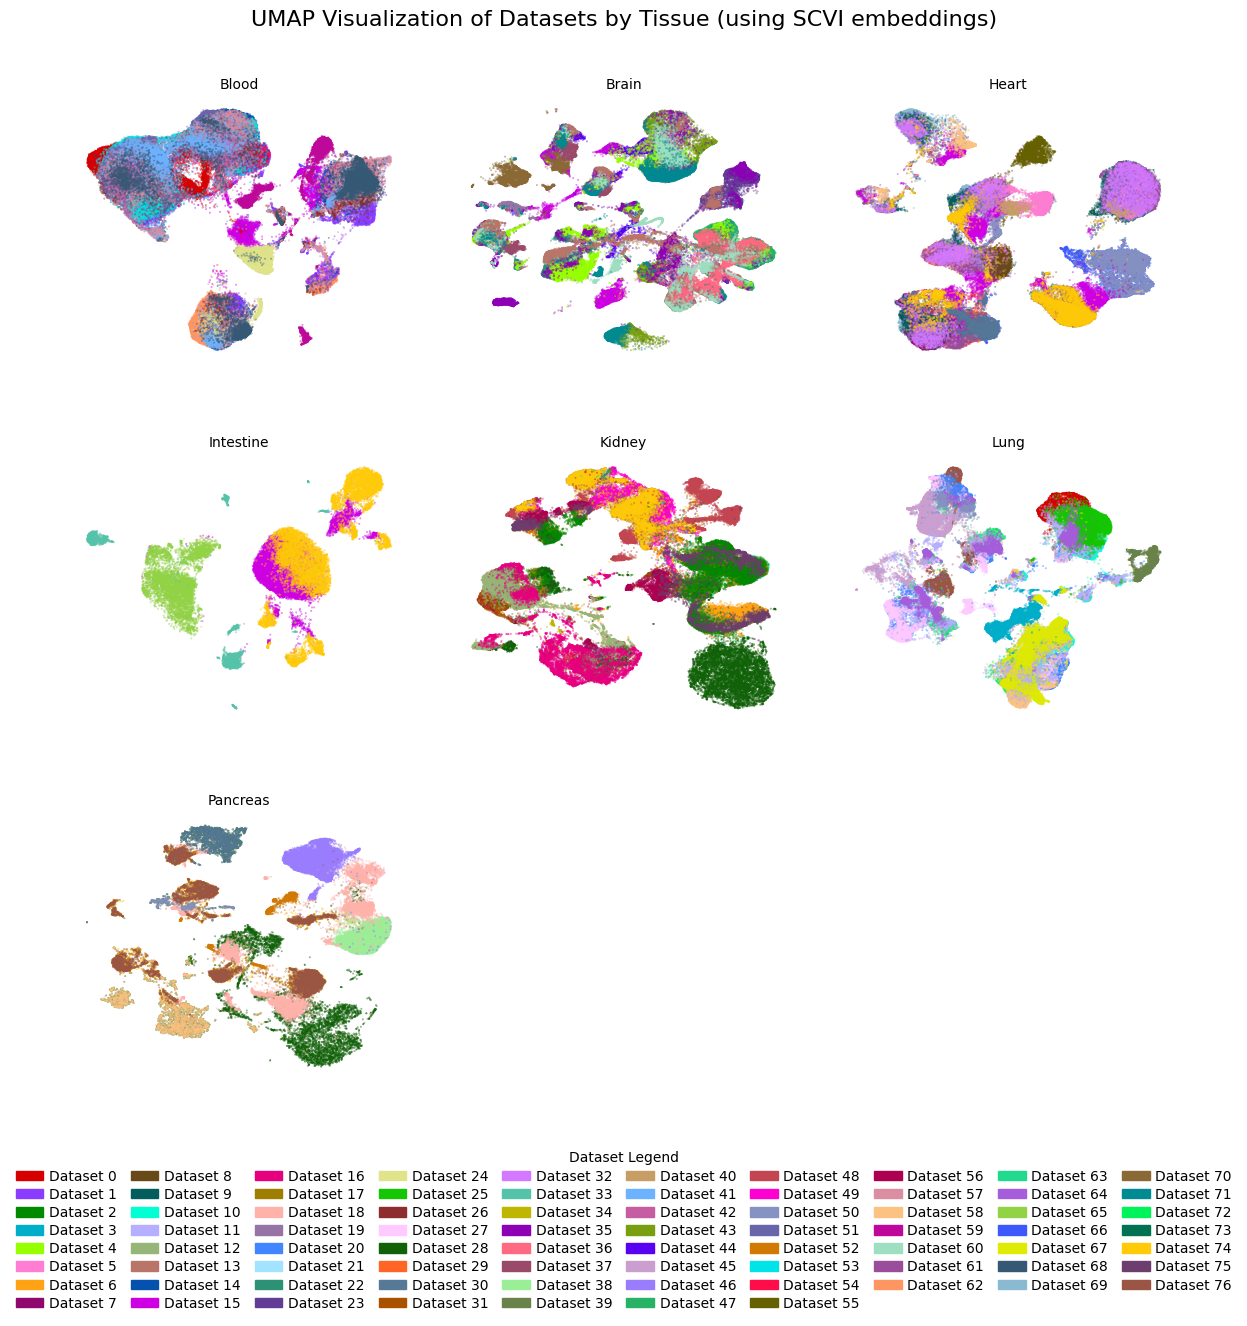


Script finished.


In [5]:
# --- Determine Layout and Figure Size ---
import math
import traceback
import scanpy as sc
from pathlib import Path
CACHE_DIR = Path("/home/common1/zyxing/scGPT/data/cellxgene/example_data_dataset/save_file/results/umap_scvi_cache_h5ad")
from matplotlib import pyplot as plt
plt.style.use("default")
n_tissues=len(tissues)
n_datasets=combined_dataset.shape[0]
tissue_to_uuids = combined_dataset.groupby('tissue')['dataset_id'].apply(list).to_dict()
n_cols = math.ceil(math.sqrt(n_tissues))
n_rows = math.ceil(n_tissues / n_cols)
legend_height_fraction = 0.45
legend_height_fraction = max(legend_height_fraction, 0.20 + 0.005 * n_datasets / 2)
legend_height_fraction = min(legend_height_fraction, 0.80)
subplot_height, subplot_width = 4, 4
total_plot_height = n_rows * subplot_height
total_fig_height = total_plot_height / (1 - legend_height_fraction)
total_fig_width = n_cols * subplot_width
total_fig_width = max(total_fig_width, 12)

fig, axes = plt.subplots(n_rows, n_cols,
                       figsize=(total_fig_width, total_fig_height),
                       squeeze=False)
axes = axes.flatten()
plot_idx = 0
for tissue in tissues:
    print(f"\nProcessing tissue: {tissue}")
    
    
    
    adatas_in_tissue = []
    uuids_loaded = []
    uuid_tuples = data_structure.get(tissue, [])
    for uuid, source_type, sublist_idx in uuid_tuples:
        print(f" Processing {uuid}...")
        adata = load_anndata_object(uuid, tissue)
        if adata is not None and adata.shape[0] > 10:
            adatas_in_tissue.append(adata)
            uuids_loaded.append(uuid)
            print(f"    -> Successfully loaded and verified {uuid} for concatenation.")
        else:
                print(f"    Skipping AnnData for {uuid} in {tissue} (load failed, low cells, or processing error).")

    if not adatas_in_tissue:
        print(f"  No usable datasets loaded for {tissue}.")
        ax.set_title(f"{tissue.capitalize()} (No Usable Data)", fontsize=10)
        action_taken = "skipped"
        plot_idx += 1
        continue

    adata_combined = None
    if len(adatas_in_tissue) == 1:
        adata_combined = adatas_in_tissue[0]
        print(f"  Processing single dataset for {tissue}: {uuids_loaded[0]} ({adata_combined.n_obs} cells)")
    else:
        print(f"  Concatenating {len(adatas_in_tissue)} datasets for {tissue}...")
        adata_combined = sc.AnnData.concatenate(
            *adatas_in_tissue, batch_key='batch_uuid', batch_categories=uuids_loaded,
            index_unique="-", join='inner', uns_merge='unique'
        )
    
    
    
    
    ax = axes[plot_idx]
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])
    cache_file = CACHE_DIR / f"precomputed_{tissue}.h5ad"
    adata_for_plotting = None # This will hold the final AnnData used for plotting
    action_taken = "skipped" # Track what happened: 'loaded_cache', 'recalculated_umap', 'full_calculation', 'skipped', 'error'
    if cache_file.exists():
        print(f"  Attempting to load cached AnnData from: {cache_file}")
        adata_cache = sc.read_h5ad(cache_file)
        adata_cache.obs['cell_type']=adata_combined.obs['cell_type']
        assert adata_cache.obs_names.equals(adata_combined.obs_names)
        # Minimum requirement: scvi embedding and batch_uuid must exist
        if ('scvi' in adata_cache.obsm and
            'batch_uuid' in adata_cache.obs.columns and
            adata_cache.obsm['scvi'].shape[0] == adata_cache.n_obs):

            print(f"  -> Found valid cache file with scvi embedding and batch_uuid.")
            if ('X_umap' in adata_cache.obsm and
                adata_cache.obsm['X_umap'].shape[0] == adata_cache.n_obs):
                print(f"  -> Found valid UMAP coordinates in cache. Loading for plotting.")
                adata_for_plotting = adata_cache
                action_taken = "loaded_cache"
            else:
                print(f"  -> Cached UMAP ('X_umap') coordinates missing or invalid. Need to calculate.")
                # Proceed to full calculation logic as cache is incomplete for plotting
        else:
            print(f"  -> Cache file {cache_file} is missing required components (scvi, batch_uuid) or has dimension mismatch. Recalculating.")
            # Proceed to full calculation logic

    else:
        print(f"  Cache file not found: {cache_file}. Performing full calculation.")
        # Proceed to full calculation logic
    if adata_for_plotting is not None:
        try:
            print(f"  Plotting {tissue} (Action: {action_taken})...")
            # 只保留 batch_uuid 在 tissue_to_uuids[tissue] 中的细胞
            valid_uuids = set(tissue_to_uuids[tissue.capitalize()])
            mask = adata_for_plotting.obs['batch_uuid'].astype(str).isin(valid_uuids)
            adata_for_plotting = adata_for_plotting[mask].copy()
            embedding_coords = adata_for_plotting.obsm['X_umap']
            cell_batch_uuids = adata_for_plotting.obs['batch_uuid'].astype(str).tolist()
            n_datasets_in_tissue_str = str(len(adata_for_plotting.obs['batch_uuid'].unique()))
            import pandas as pd
            for batch_uuid in adata_for_plotting.obs['batch_uuid'].unique():
                batch_mask = adata_for_plotting.obs['batch_uuid'] == batch_uuid
                batch_umap = adata_for_plotting.obsm['X_umap'][batch_mask.values]
                batch_cell_type = adata_for_plotting.obs['cell_type'][batch_mask.values]
                df = pd.DataFrame(batch_umap, columns=['UMAP1', 'UMAP2'])
                df['cell_type'] = batch_cell_type.values
                csv_name = f"umaps/{tissue}_{batch_uuid}.csv"
                df.to_csv(csv_name, index=False)
                print(f"Saved {csv_name}")
            # Get colors
            plot_colors = [uuid_to_color.get(uuid, '#808080') for uuid in cell_batch_uuids]
            missing_uuids_count = plot_colors.count('#808080')
            if missing_uuids_count > 0:
                 print(f"    Warning: {missing_uuids_count} cells correspond to UUIDs not found in the global color map. Plotted as gray.")

            # Plotting
            ax.scatter(embedding_coords[:, 0], embedding_coords[:, 1], c=plot_colors, s=0.1, alpha=0.7, rasterized=True)
            ax.set_title(f"{tissue.capitalize()}", fontsize=10)
            print(f"  Plotting for {tissue} complete.")

        except Exception as e_plot:
             print(f"  ERROR during plotting for {tissue}: {e_plot}")
             traceback.print_exc()
             ax.set_title(f"{tissue.capitalize()} (Plotting Error)", fontsize=10)
             action_taken = "error"
             raise
    elif action_taken != "error" and action_taken != "skipped":
        # This case means something went wrong, but wasn't caught as specific error
         print(f"  Skipping plot for {tissue} due to unavailable data (Action: {action_taken}).")
         if not ax.get_title():
             ax.set_title(f"{tissue.capitalize()} (Data Prep Failed)", fontsize=10)

    # Increment plot index only if no fatal error occurred that skipped to the next tissue earlier
    if action_taken != "error" and action_taken != "skipped":
        plot_idx += 1
    elif action_taken == "skipped" and not ax.get_title(): # Handle case where skipping happened before title set
        ax.set_title(f"{tissue.capitalize()} (Skipped)", fontsize=10)
        plot_idx += 1


# --- Hide Unused Subplots ---
for i in range(plot_idx, n_rows * n_cols):
    axes[i].set_visible(False)

# --- Create Shared Legend ---
# (Legend code remains the same as before)
print("\nGenerating legend...")
legend_handles = []
for uuid in sorted_unique_uuids:
    label = uuid_to_shortname.get(uuid, uuid)
    handle = mpatches.Patch(color=uuid_to_color[uuid], label=label)
    legend_handles.append(handle)

legend_fontsize = 'medium'

title_fontsize = 'medium'
legend_ncol = 10
available_legend_width_inches = total_fig_width * 0.9
estimated_item_width_chars = 15
chars_per_inch = 10
estimated_item_width_inches = estimated_item_width_chars / chars_per_inch
max_cols_fit = max(1, int(available_legend_width_inches / estimated_item_width_inches))
print(f"Setting legend columns: {legend_ncol}")

legend_handletextpad = 0.4
legend_columnspacing = 1.0
legend_labelspacing = 0.3

plot_area_bottom = legend_height_fraction + 0.03
fig.subplots_adjust(
    left=0.04, right=0.96, bottom=plot_area_bottom, top=0.93,
    wspace=0.15, hspace=0.35
)
legend_anchor_y = plot_area_bottom - 0.03

fig.legend(
    handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, legend_anchor_y),
    bbox_transform=fig.transFigure, ncol=legend_ncol, fontsize=legend_fontsize,
    title="Dataset Legend", title_fontsize=title_fontsize, borderaxespad=0.1,
    handletextpad=legend_handletextpad, columnspacing=legend_columnspacing,
    labelspacing=legend_labelspacing, frameon=False
)

plt.suptitle("UMAP Visualization of Datasets by Tissue (using SCVI embeddings)", fontsize=16, y=0.97)

plt.show()
print("\nScript finished.")

            


In [6]:
adata_cache.obs_names

Index(['129572-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '115598-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '126128-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '139065-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '122773-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '134245-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '139746-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '130127-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '117776-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       '126990-3294d050-6eeb-4a00-b24c-71aacc9b777f',
       ...
       '43721-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43722-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43723-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43724-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43725-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43726-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43727-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43728-5a11f879-d1ef-458a-910c-9b0bdfca5ebf',
       '43729-5a11f879-d1